In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import networkx as nx
import music21 as msc
from funciones import *
import sys
import os

env = msc.environment.UserSettings()
#env['musicxmlPath'] = r'C:\Program Files (x86)\Finale NotePad 2012\Finale NotePad.exe' #Path a la aplicacion Finale
#env['musicxmlPath'] = r'C:\Program Files (x86)\MuseScore 2\bin\MuseScore.exe'          #Path a la aplicacion MuseScore 
#env['musicxmlPath']='/usr/bin/mscore'
msc.environment.set('musescoreDirectPNGPath', 'C:\\Program Files (x86)\\MuseScore 2\\bin\\MuseScore.exe')
msc.environment.set('musicxmlPath', 'C:\\Program Files (x86)\\MuseScore 2\\bin\\MuseScore.exe')


In [ ]:
#---------------------------------------------------------------------
#Funciones:
#Lista de funciones:
# f_xml2graph (cancion, nombre_parte=0,modelo='melodia')
# graficar (G, color_map='rainbow',layout='espiral', labels=False)
# ql_2_fig (ql)
# f_motifs_rhytmic (cancion,length,nombre_parte=0)
# f_motifs_tonal (cancion,length,nombre_parte=0)
# f_grado_dist_M (G)
# f_grado_dist_H (G)
# f_tabla (G,nombre)
# f_xml2graph_armonia (cancion, index)
# f_armon (cancion, indexes)
# graficar_armonias_undirected(G, color_map='rainbow',layout='espiral')
# graficar_armonias_directed(Armonias)
# f_dist_escalas (cancion, nombre_parte=0)
# f_full_graph(path)
# f_hierarchy(G)

In [6]:
#---------------------------------------------------------------------------------------
#Análisis de ARTISTAS
#---------------------------------------------------------------------
#Empecemos con un analisis de un artista, lo pasamos a 2 y después lo pasamos a género
#Para clásica, usamos la base de datos de music21, para Bach son muchisimas asi que pruebo con Mozart que son 16 (tarda 1min)
from music21 import corpus

musicos_1=['mozart', 'bach', 'beethoven'] #son los más conocidos y que más biblio tienen 

#creo una lista que contenga los grafos con cada artista, por ahora hay solo 2 grafos por artista va a ser un tuple
G=[]

for l, musico in enumerate(musicos_1):
    paths = corpus.getComposer(musico)
    paths=paths[0:20] #corta hasta los primeros 20 temas
    for i, path in enumerate(paths):
        M,R=f_full_graph(path)
        G.append((M,R))

# Ahora buscamos los artistas que nosotros encontramos, vamos a trabajar con los beatles
musicos_2=['Bealtes'] #aca se podrian ir agregando si trabajasemos con más tipo Queen y Charly

for l, musico in enumerate(musicos_2)
    myFolder = (os.getcwd()+'\\partituras\\'+musico) # busca en el directorio actual
    arch=os.listdir(myFolder) #lista con los nombres de las canciones
    paths=[] #lista con las direcciones completas
    for i, arc in enumerate(arch):
        paths.append(myFolder+'\\'+arc)

    paths=paths[0:20]
    for i, path in enumerate(paths):
        M,R=f_full_graph(path)
        G.append((M,R)) #le agrego a G las redes de los beatles

musicos=musicos_1+musicos_2

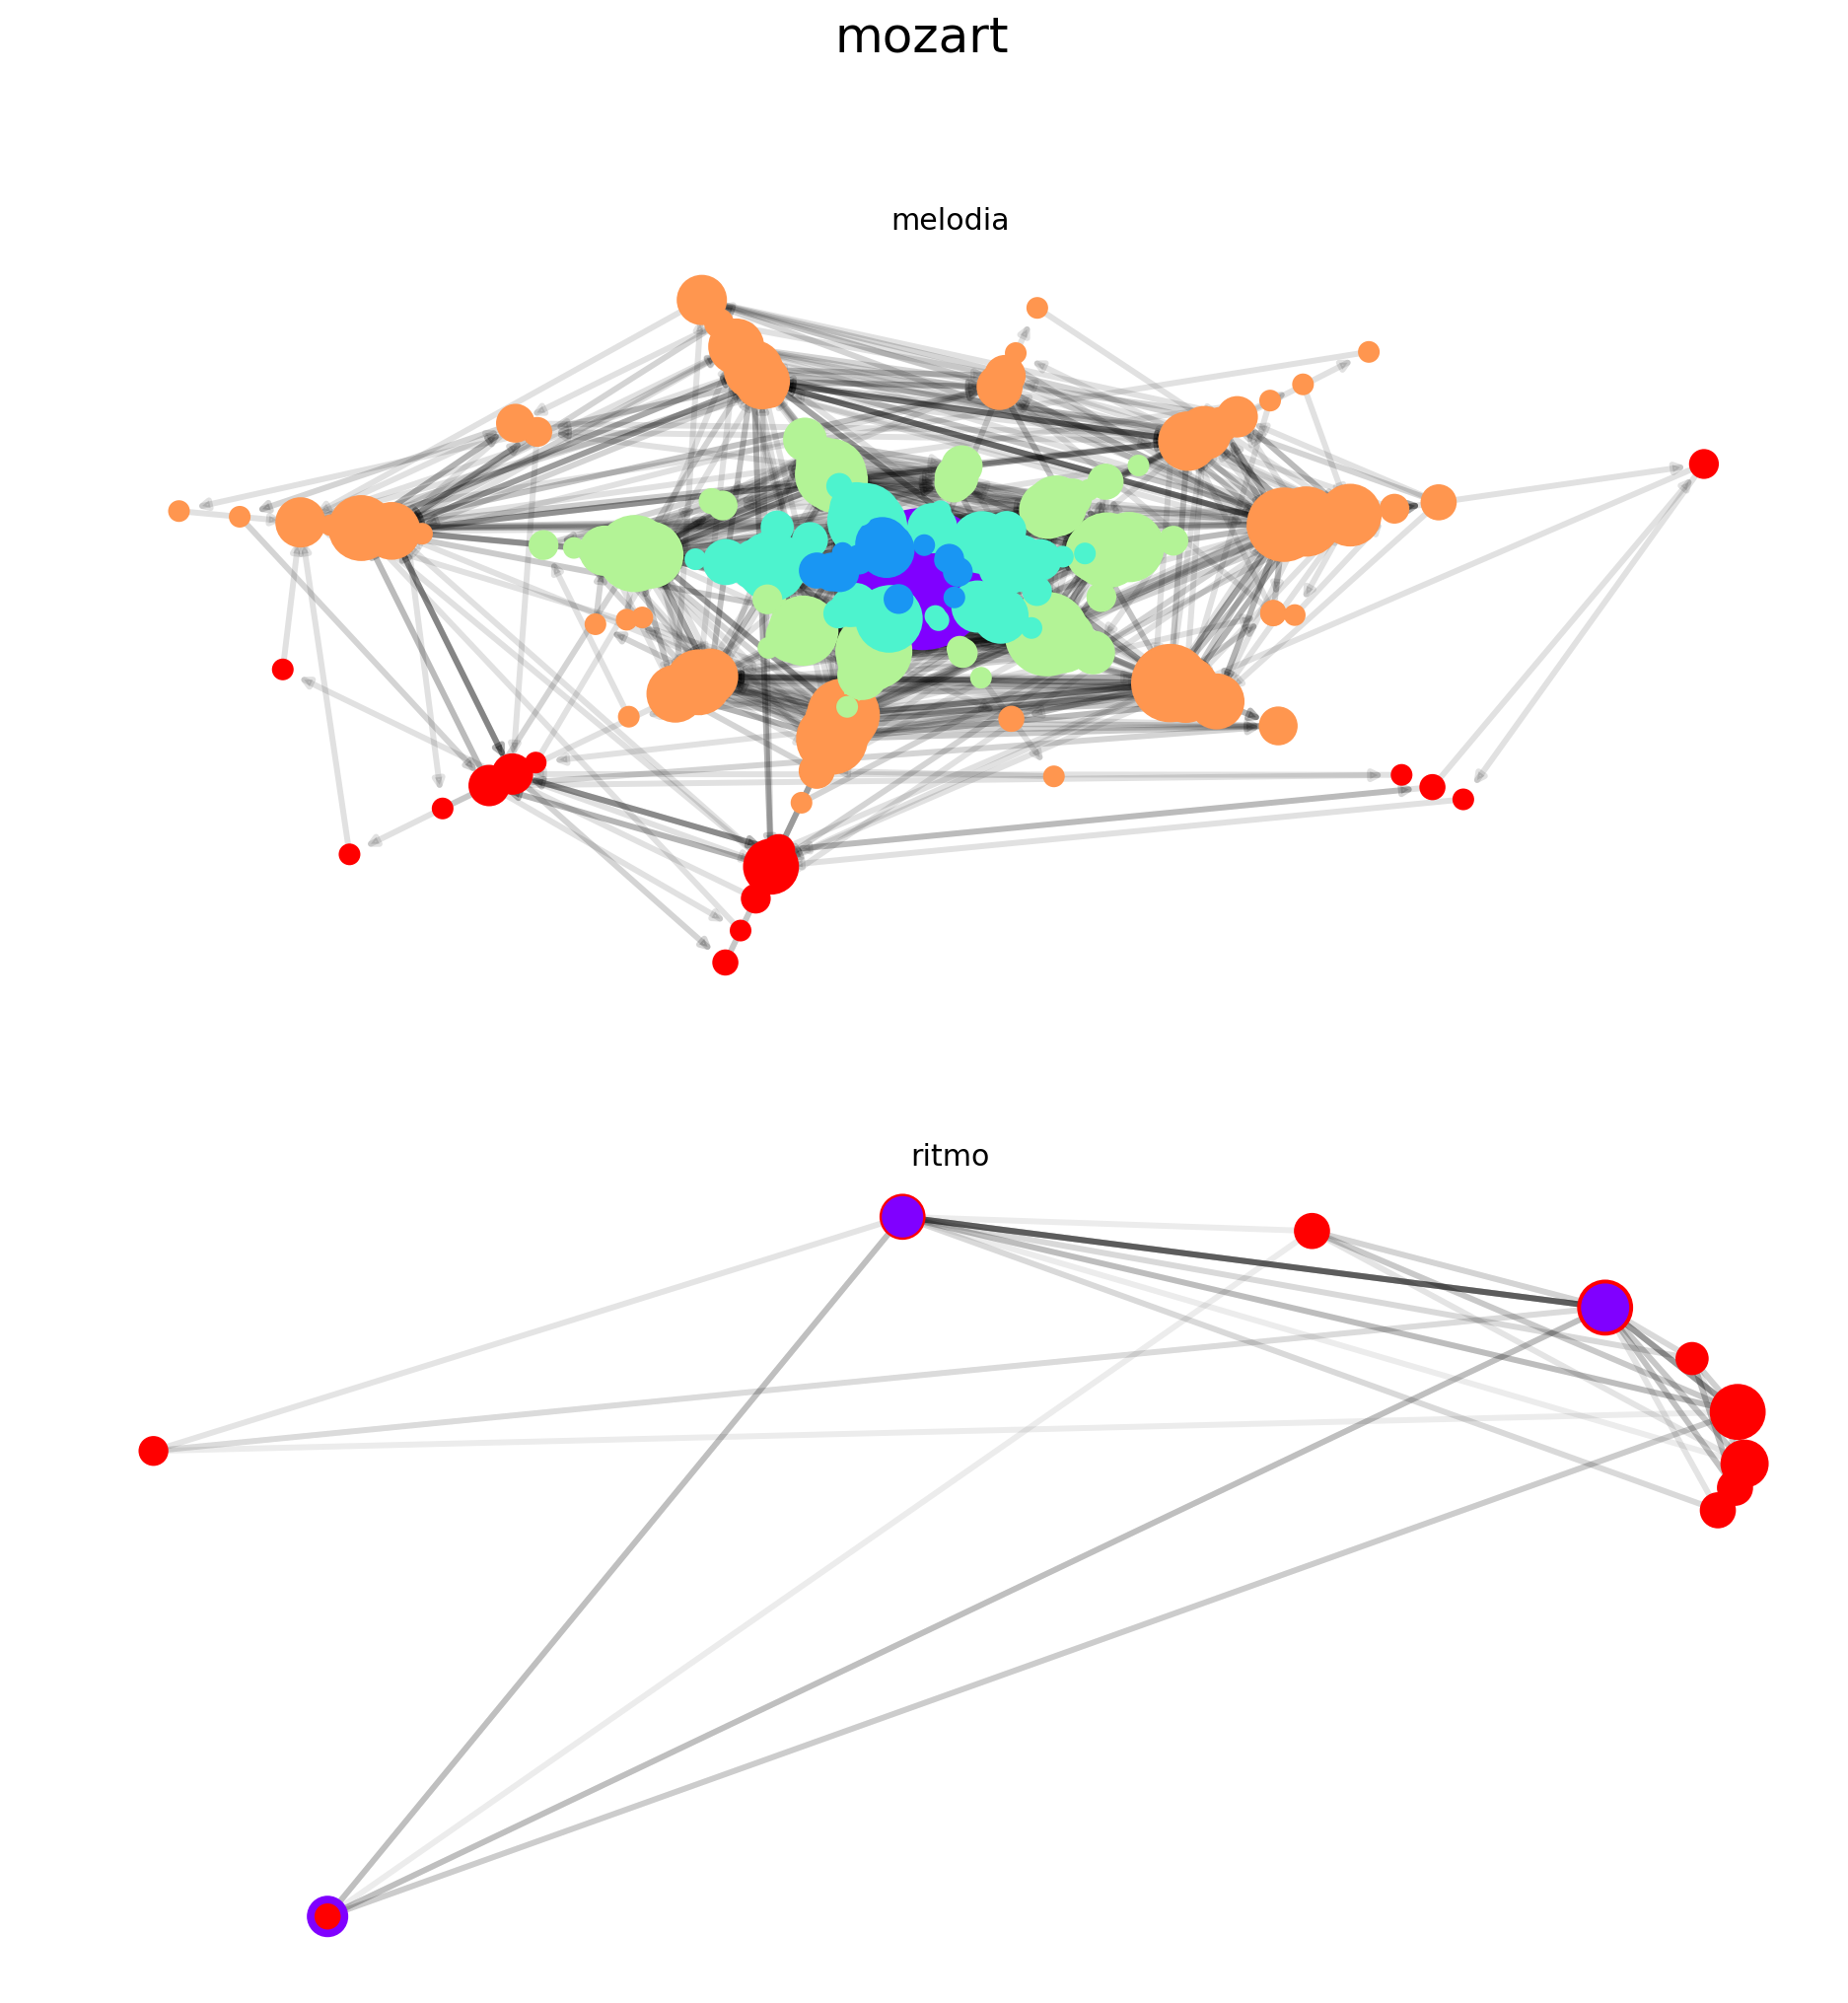

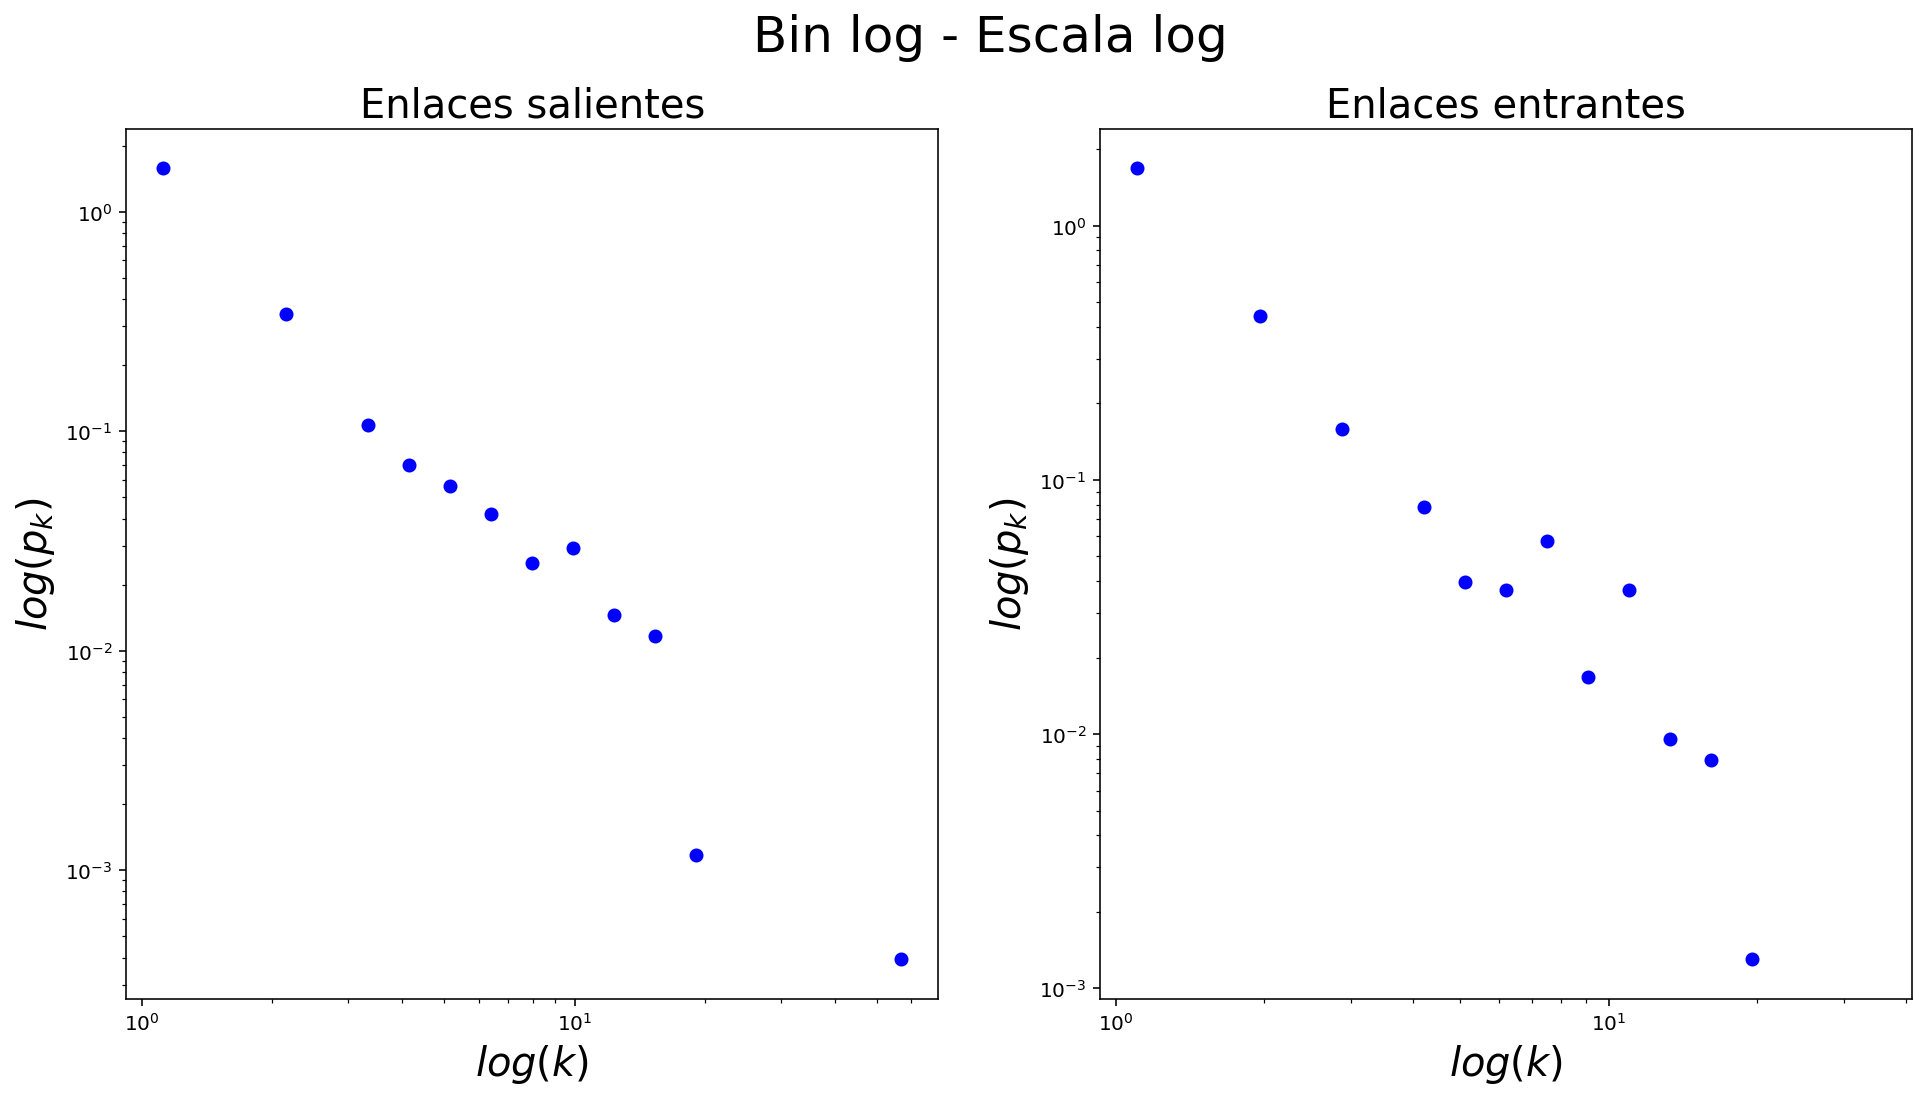

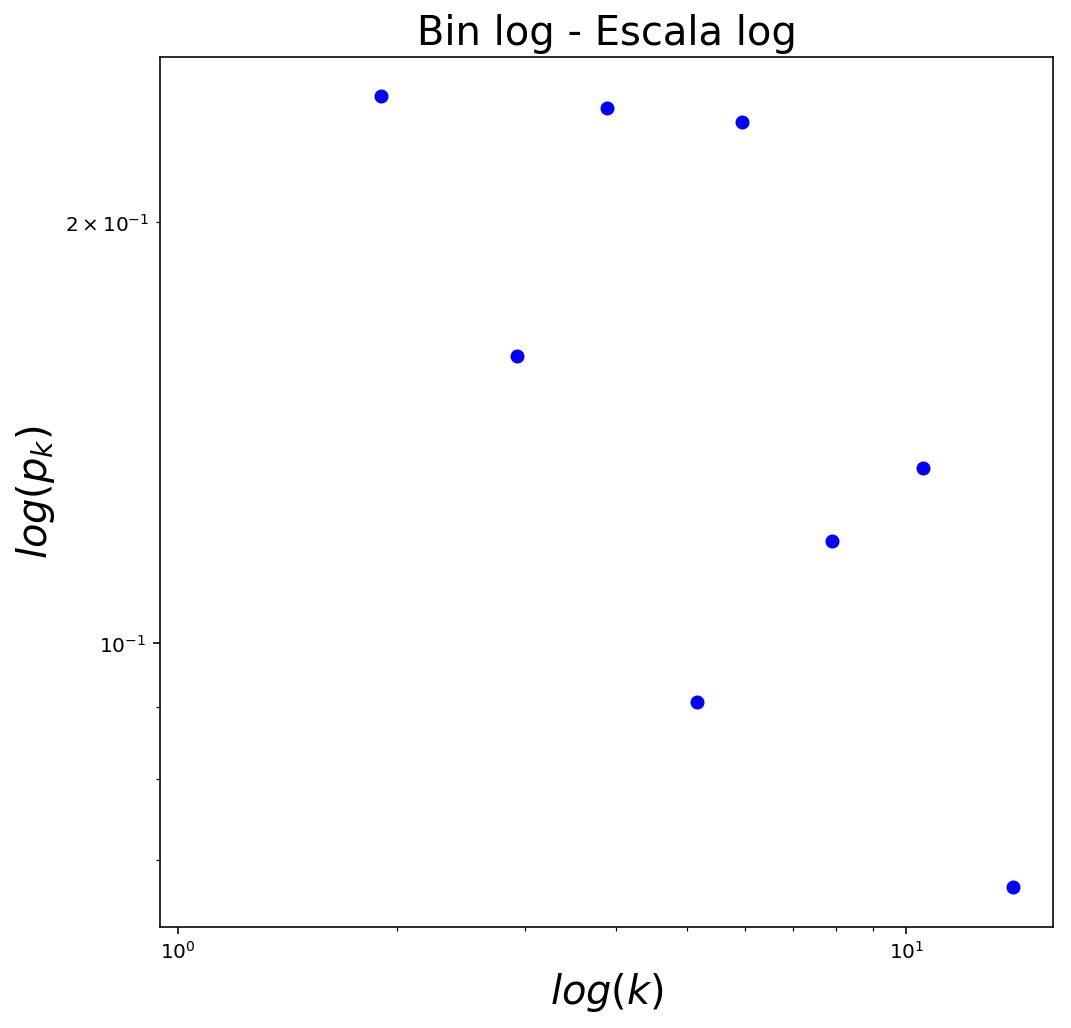

      Red  Nodos  Enlaces  <K> <K_{in}> <K_{out}> K_{in} max K_{in} min  \
0  mozart    206      892  NaN   4.3301    4.3301         38          1   
0  mozart     15       57    8      NaN       NaN        NaN        NaN   

  K_{out} max K_{out} min  Densidad  <C_local>  C_global Diametro  <Min Dist>  
0          63           1  0.021122   0.215175  0.148082      NaN        3.96  
0         NaN         NaN  0.542857   0.751941  0.548673        2        1.54  


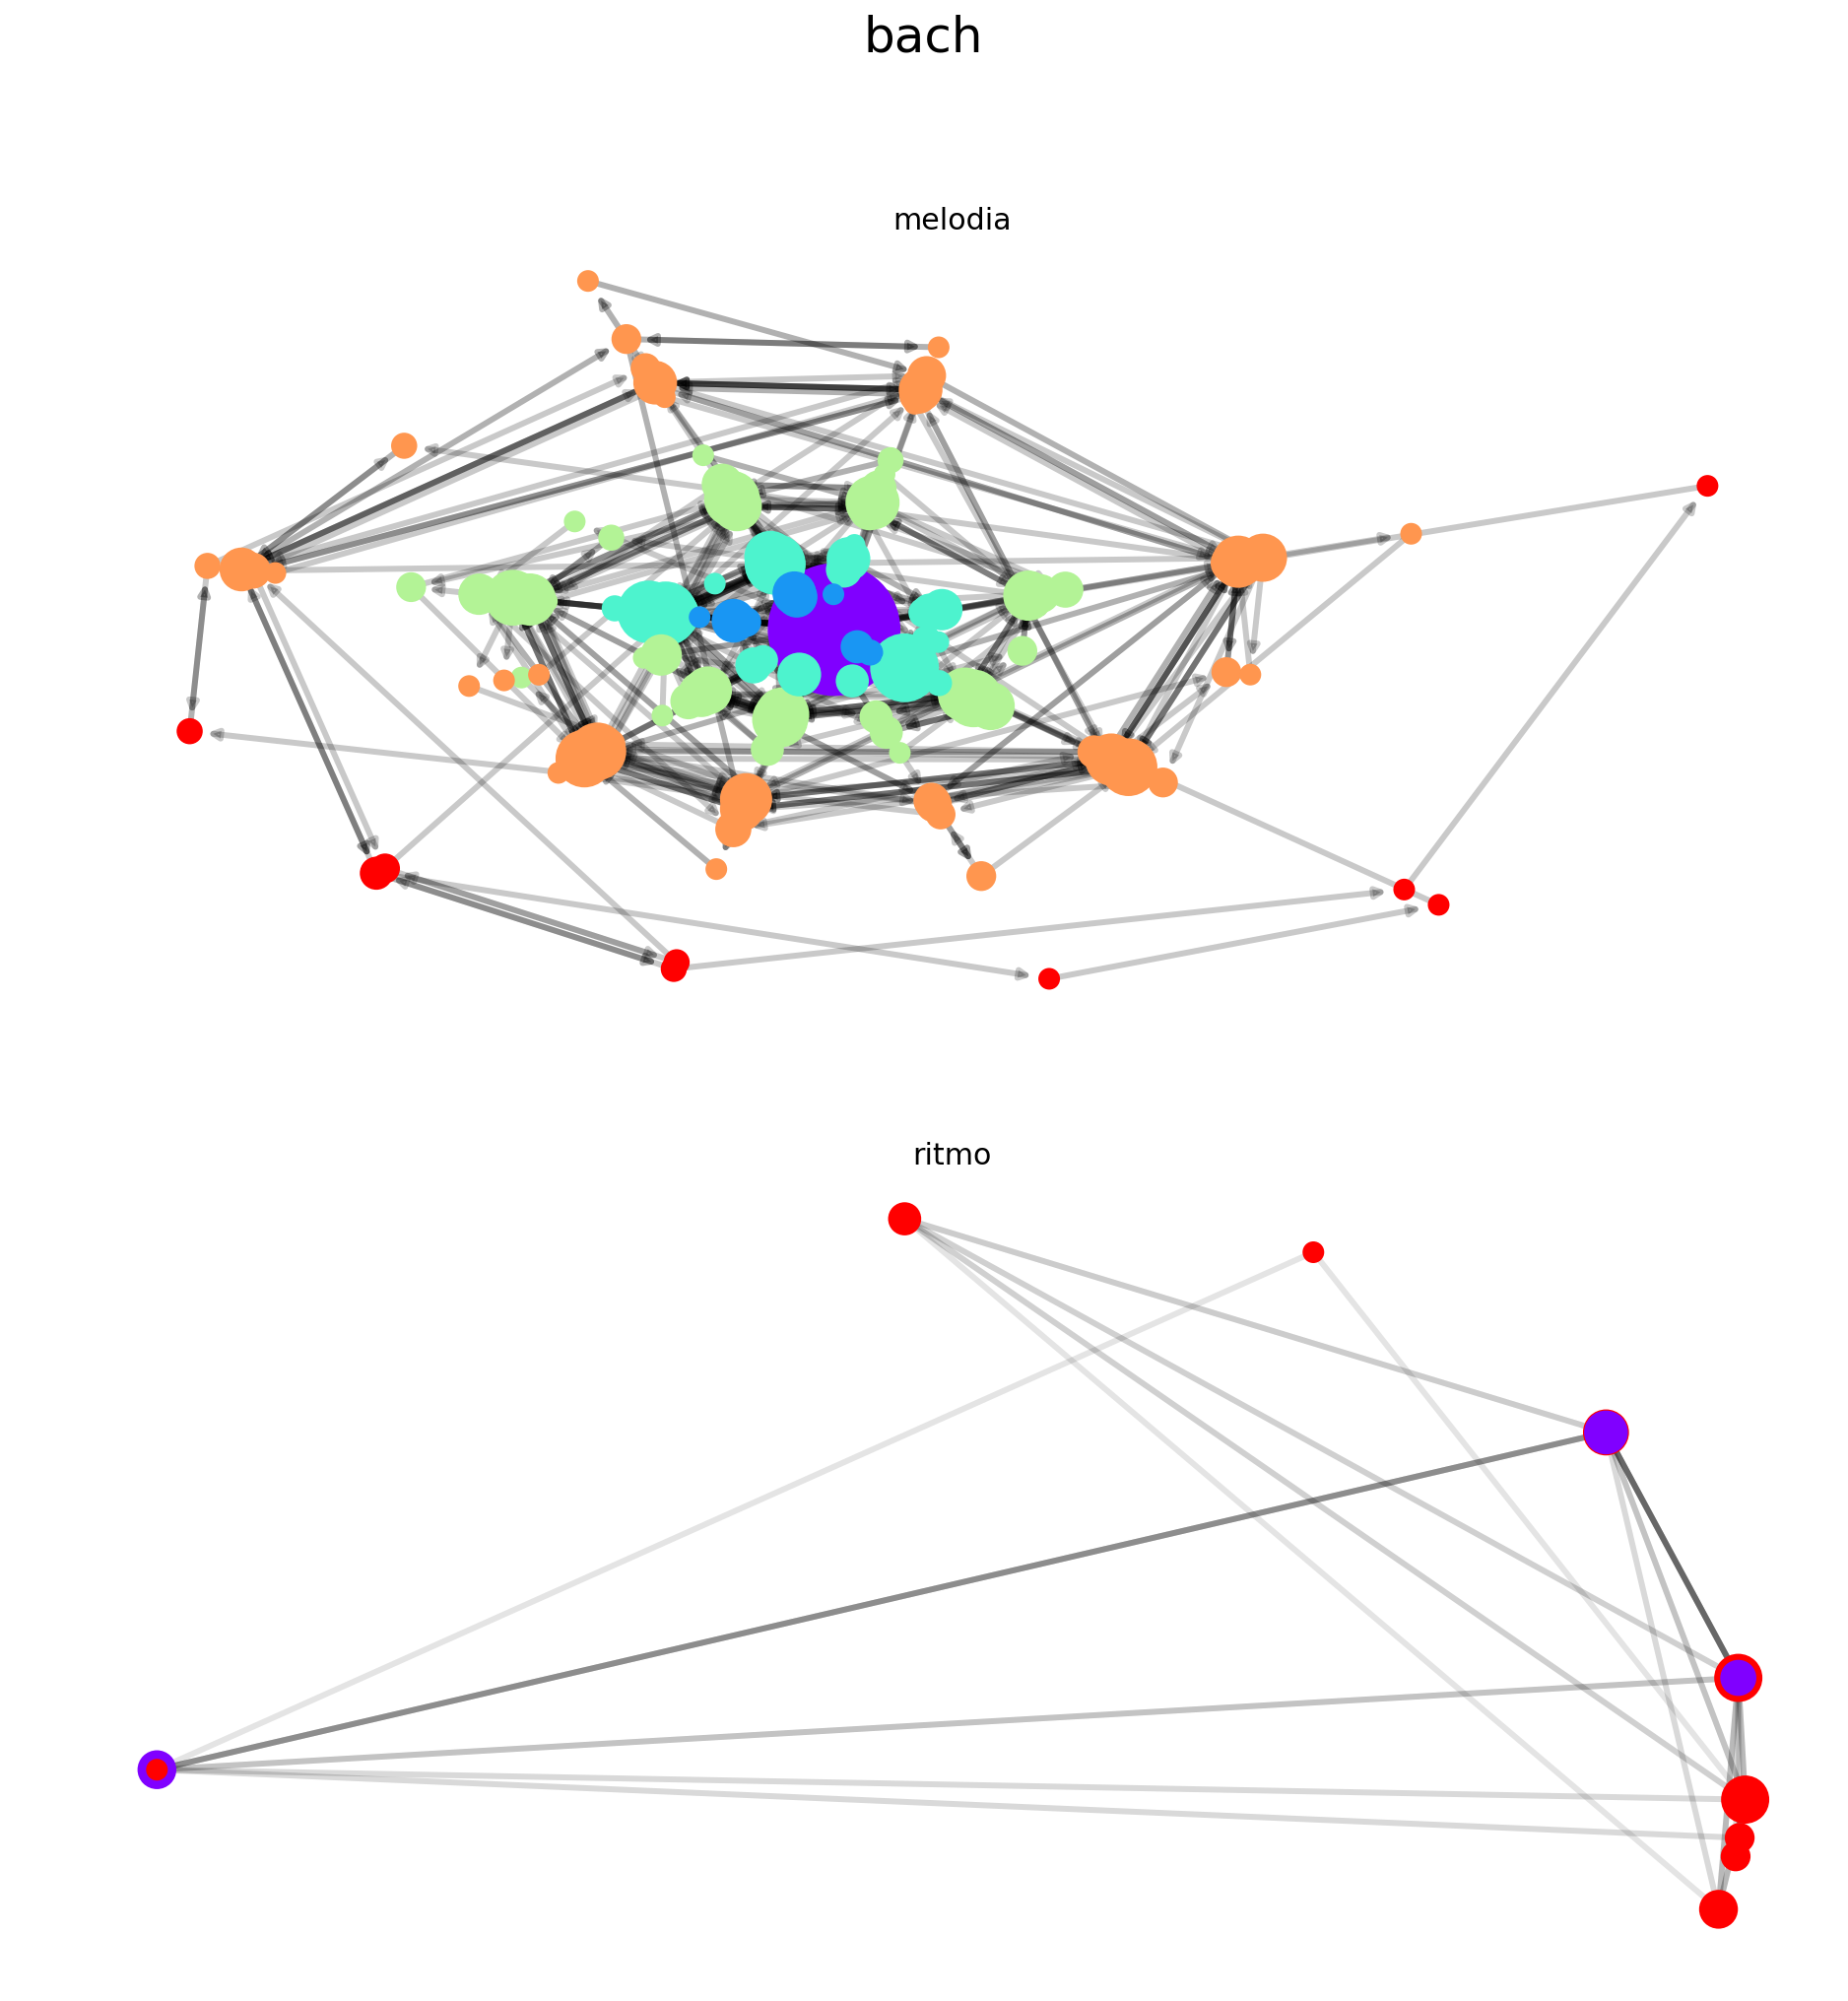

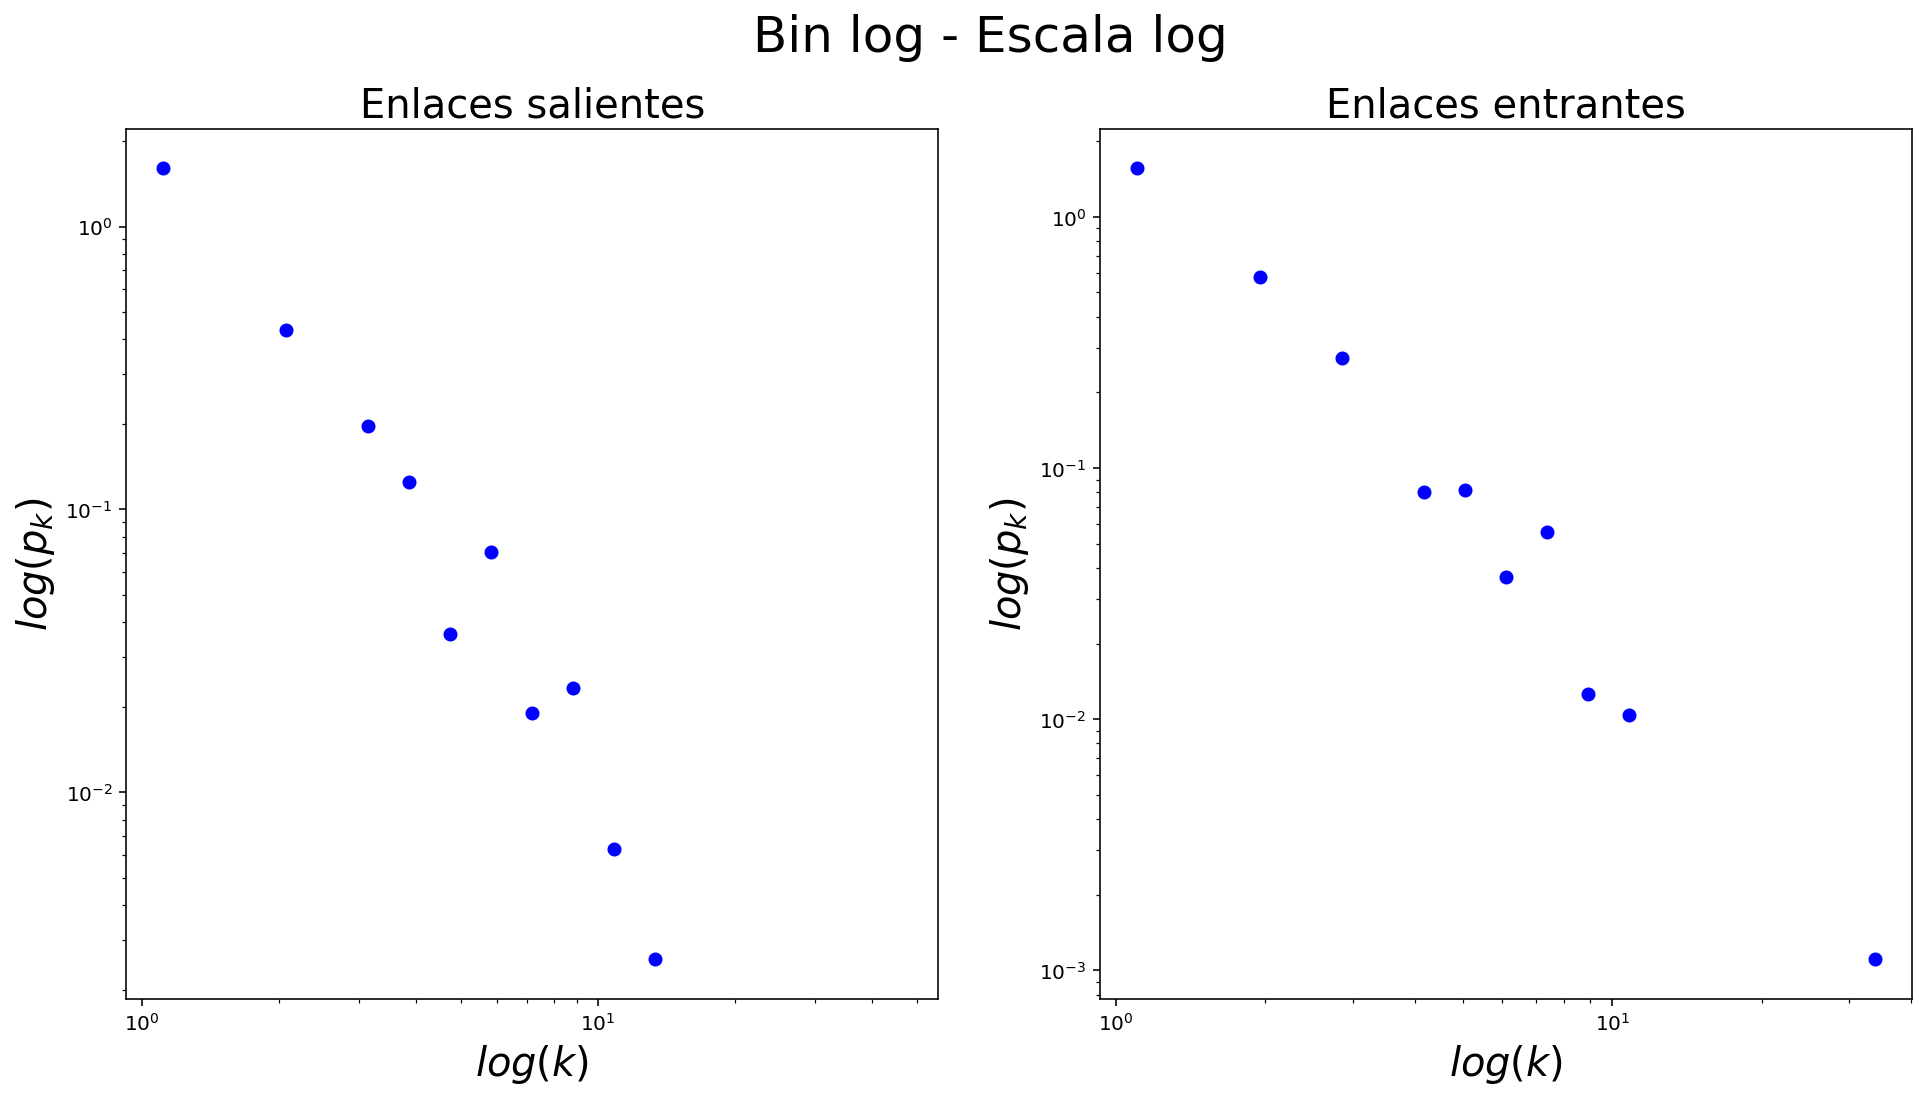

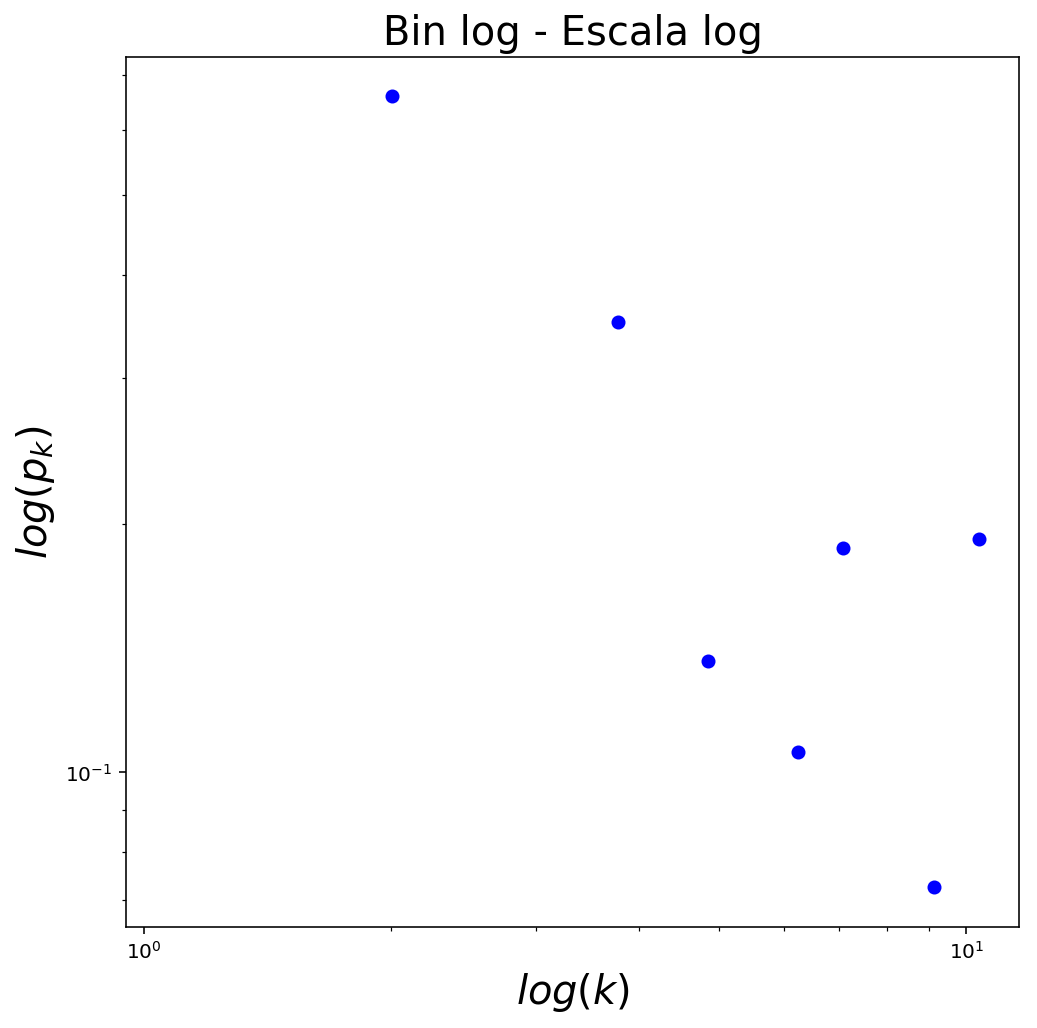

    Red  Nodos  Enlaces  <K> <K_{in}> <K_{out}> K_{in} max K_{in} min  \
0  bach    141      473  NaN  3.35461   3.35461         37          1   
0  bach     12       39    6      NaN       NaN        NaN        NaN   

  K_{out} max K_{out} min  Densidad  <C_local>  C_global Diametro  <Min Dist>  
0          51           1  0.023961   0.201133  0.104413      NaN        3.94  
0         NaN         NaN  0.590909   0.800265  0.646409        3        1.56  


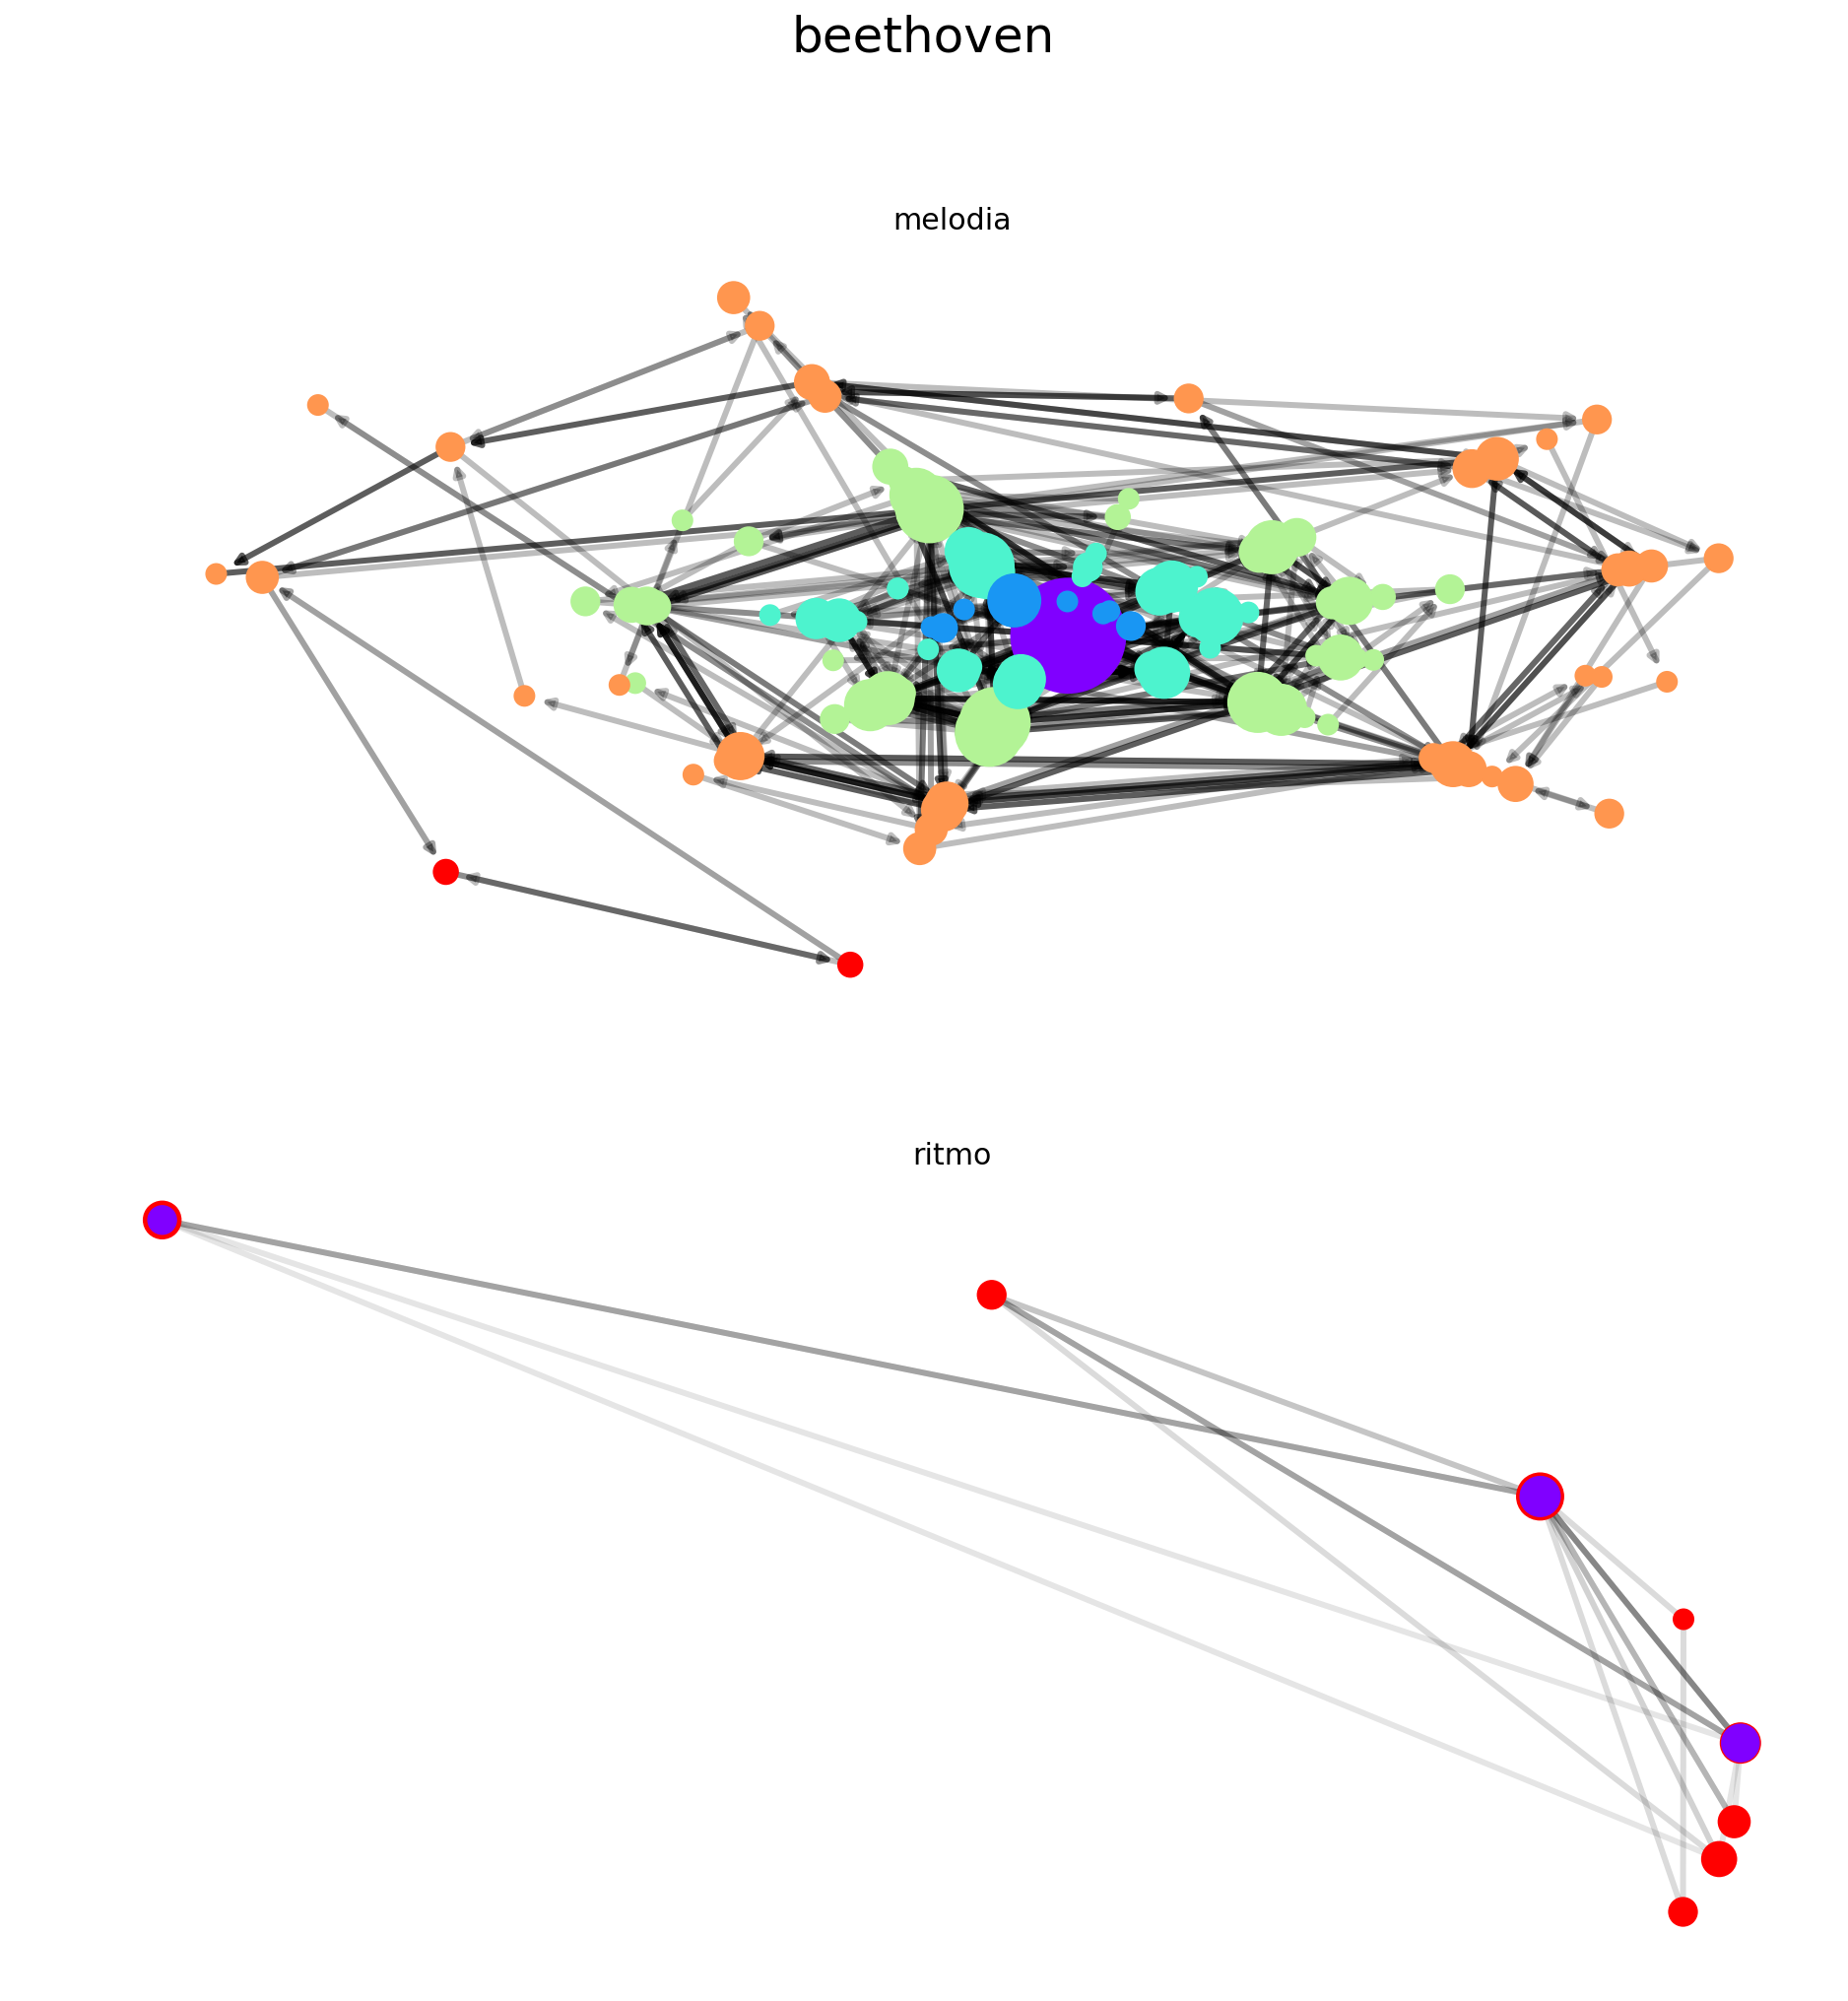

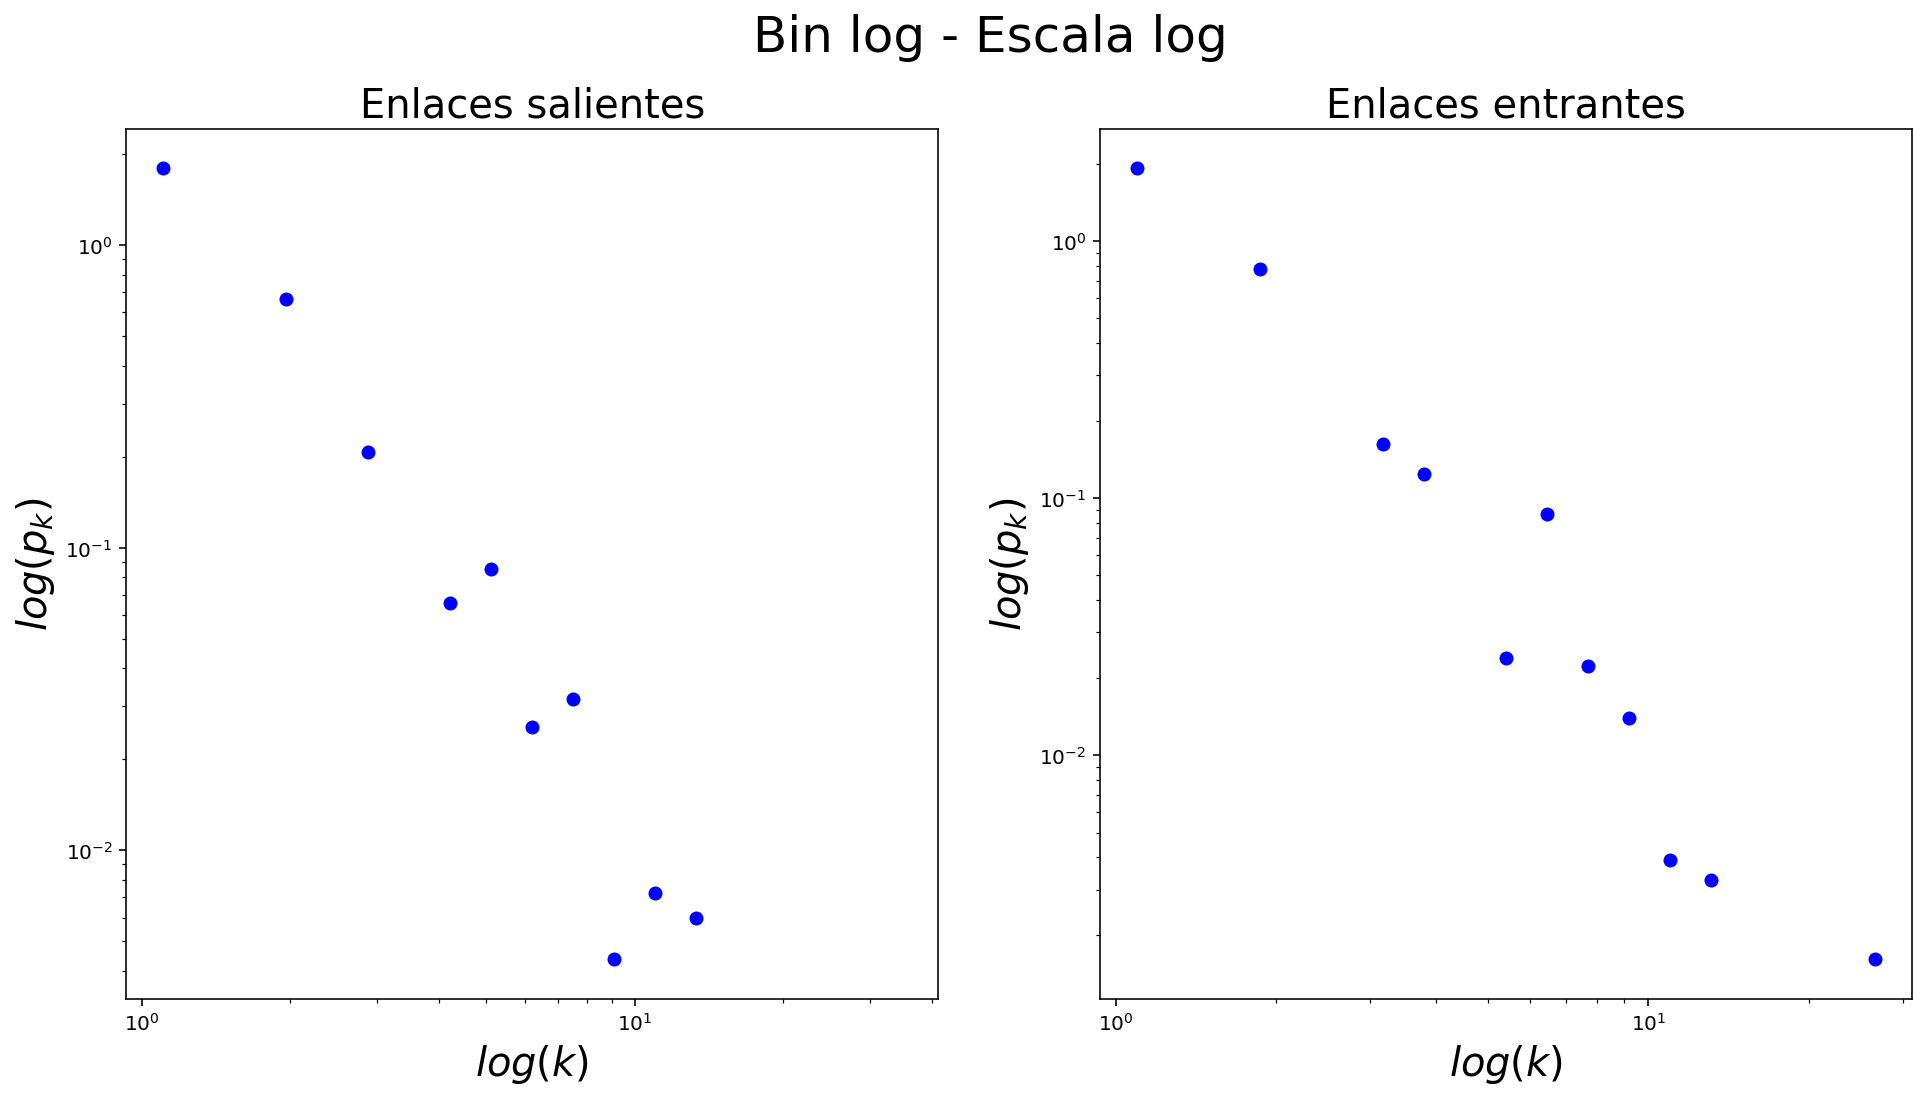

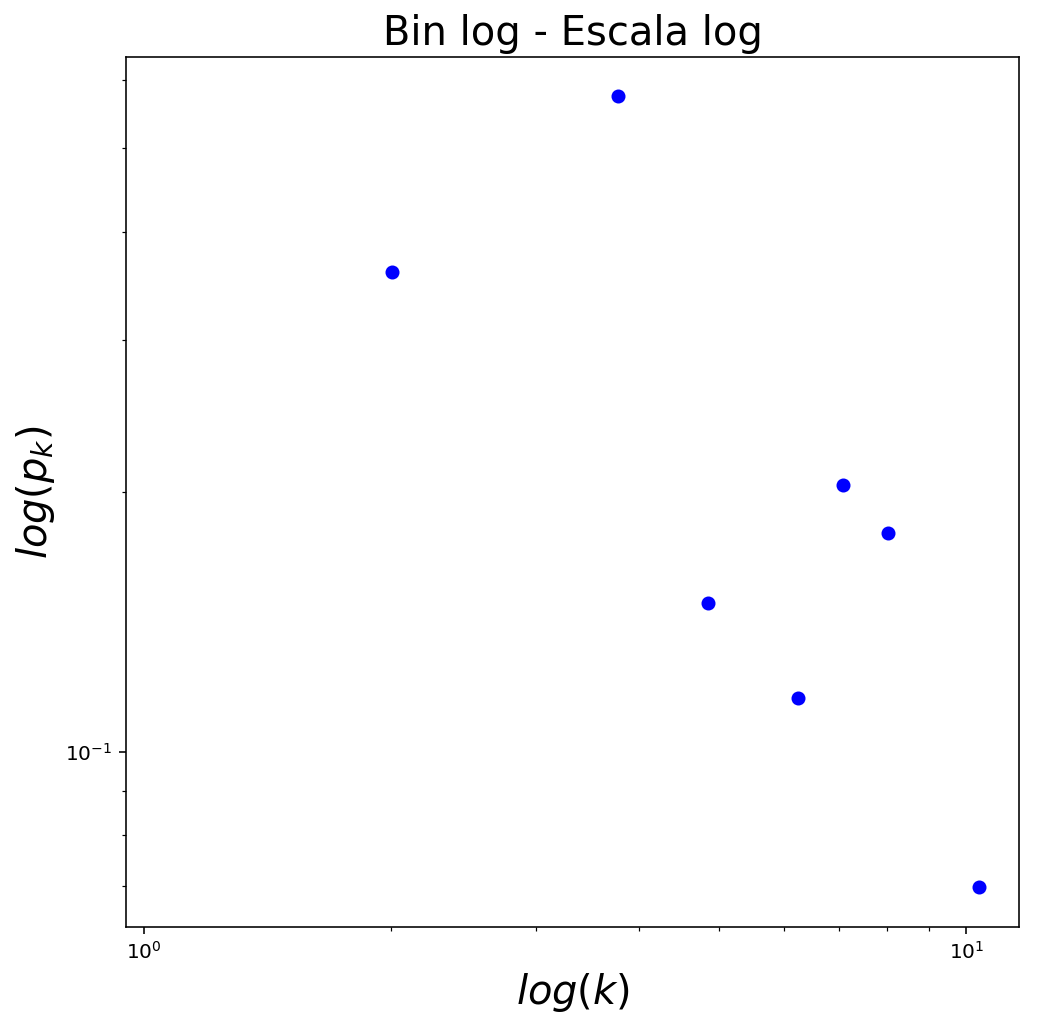

         Red  Nodos  Enlaces  <K> <K_{in}> <K_{out}> K_{in} max K_{in} min  \
0  beethoven    132      408  NaN  3.09091   3.09091         29          1   
0  beethoven     11       33    6      NaN       NaN        NaN        NaN   

  K_{out} max K_{out} min  Densidad  <C_local>  C_global Diametro  <Min Dist>  
0          38           1  0.023595   0.209361  0.163616      NaN        4.48  
0         NaN         NaN  0.600000   0.744949  0.548077        3        1.62  


In [11]:
#---------------------------------------------------------------------
#Graficamos ambos grafos 
outfolder ='C:/Users/Lucio/Desktop/FACULTAD/Redes/datos/datosTPE/'

for l,musico in enumerate(musicos):

    plt.figure(figsize=(16,16))
    plt.suptitle(musico,fontsize=25)

    plt.subplot(2, 1, 1)
    plt.title('melodia',fontsize=15)
    graficar(G[l][0],labels=False)

    plt.subplot(2, 1, 2)
    plt.title('ritmo',fontsize=15)
    graficar(G[l][1],labels=False)

    plt.savefig(outfolder+musico+'_grafos.png')
    plt.show()

#---------------------------------------------------------------------
    #Graficamos sus distribuciones de grados y creamos una tabla (son 2 por cada cancion en melodia y 1 por rítmica)
    #plt.figure(figsize=(16,16))
    #plt.suptitle(musico,fontsize=25)
    #plt.subplot(2, 1, 1)
    #plt.title('melodia',fontsize=15)
    f_grado_dist_M(G[l][0])
    #plt.savefig(outfolder+'Mozart'+'_distrib_m.png') No se porque no me los guarda
    #plt.subplot(2, 1, 2)
    #plt.title('ritmo',fontsize=15)
    f_grado_dist_H(G[l][1])
    #plt.savefig(outfolder+musico+'_distrib_r.png')
    
    #plt.savefig(outfolder+musico+'_distribuciones.png')
    #plt.show()

    pd_m=f_tabla(G[l][0],musico)
    pd_r=f_tabla(G[l][1],musico)
    frames = [pd_m, pd_r]
    result = pd.concat(frames)
    print(result)
    result.to_csv(outfolder+musico)
    
#---------------------------------------------------------------------





In [ ]:
#---------------------------------------------------------------------------------------
#Análisis por GÉNERO
#---------------------------------------------------------------------
#¡POR SUERTE! separamos los musicos por género (?)
#Veamos Clasico vs Rock, para eso vamos a hacer los mismos análisis pero vamos a pegotear todavia más los grafos
#Tomamos la parte correspondiente de G que es de clásico
Lclasic=len(musicos_1)
Lrock=len(musicos_2)

#creo una lista de grafos que va a tener todas las tuples de melodia y ritmo para clasica y rock
clasicos_mel=[]
clasicos_rit=[]
rock_mel=[]
rock_rit=[]
M_cl=nx.DiGraph()
R_cl=nx.Graph()
M_rk=nx.DiGraph()
R_ck=nx.Graph()

for i,mus in enumerate(musicos):
    if i <= Lclasic:
        clasicos_mel.append(G[i][0])
        clasicos_rit.append(G[i][1])
    else:
        rock_mel.append(G[i][0])
        rock_rit.append(G[i][1])
        
#Listo ya separamos en género, ahora vamos a mergearlos
#primero los clasicos
for i, g in enumerate(clasicos_mel):
    M_cl=nx.compose(M_cl,clasicos_mel[i])
    R_cl=nx.compose(R_cl,clasicos_rit[i])
    
#ahora el rock
for i, g in enumerate(rock_mel):
    M_rk=nx.compose(M_rk,rock_mel[i])
    R_rk=nx.compose(R_rk,rock_rit[i])

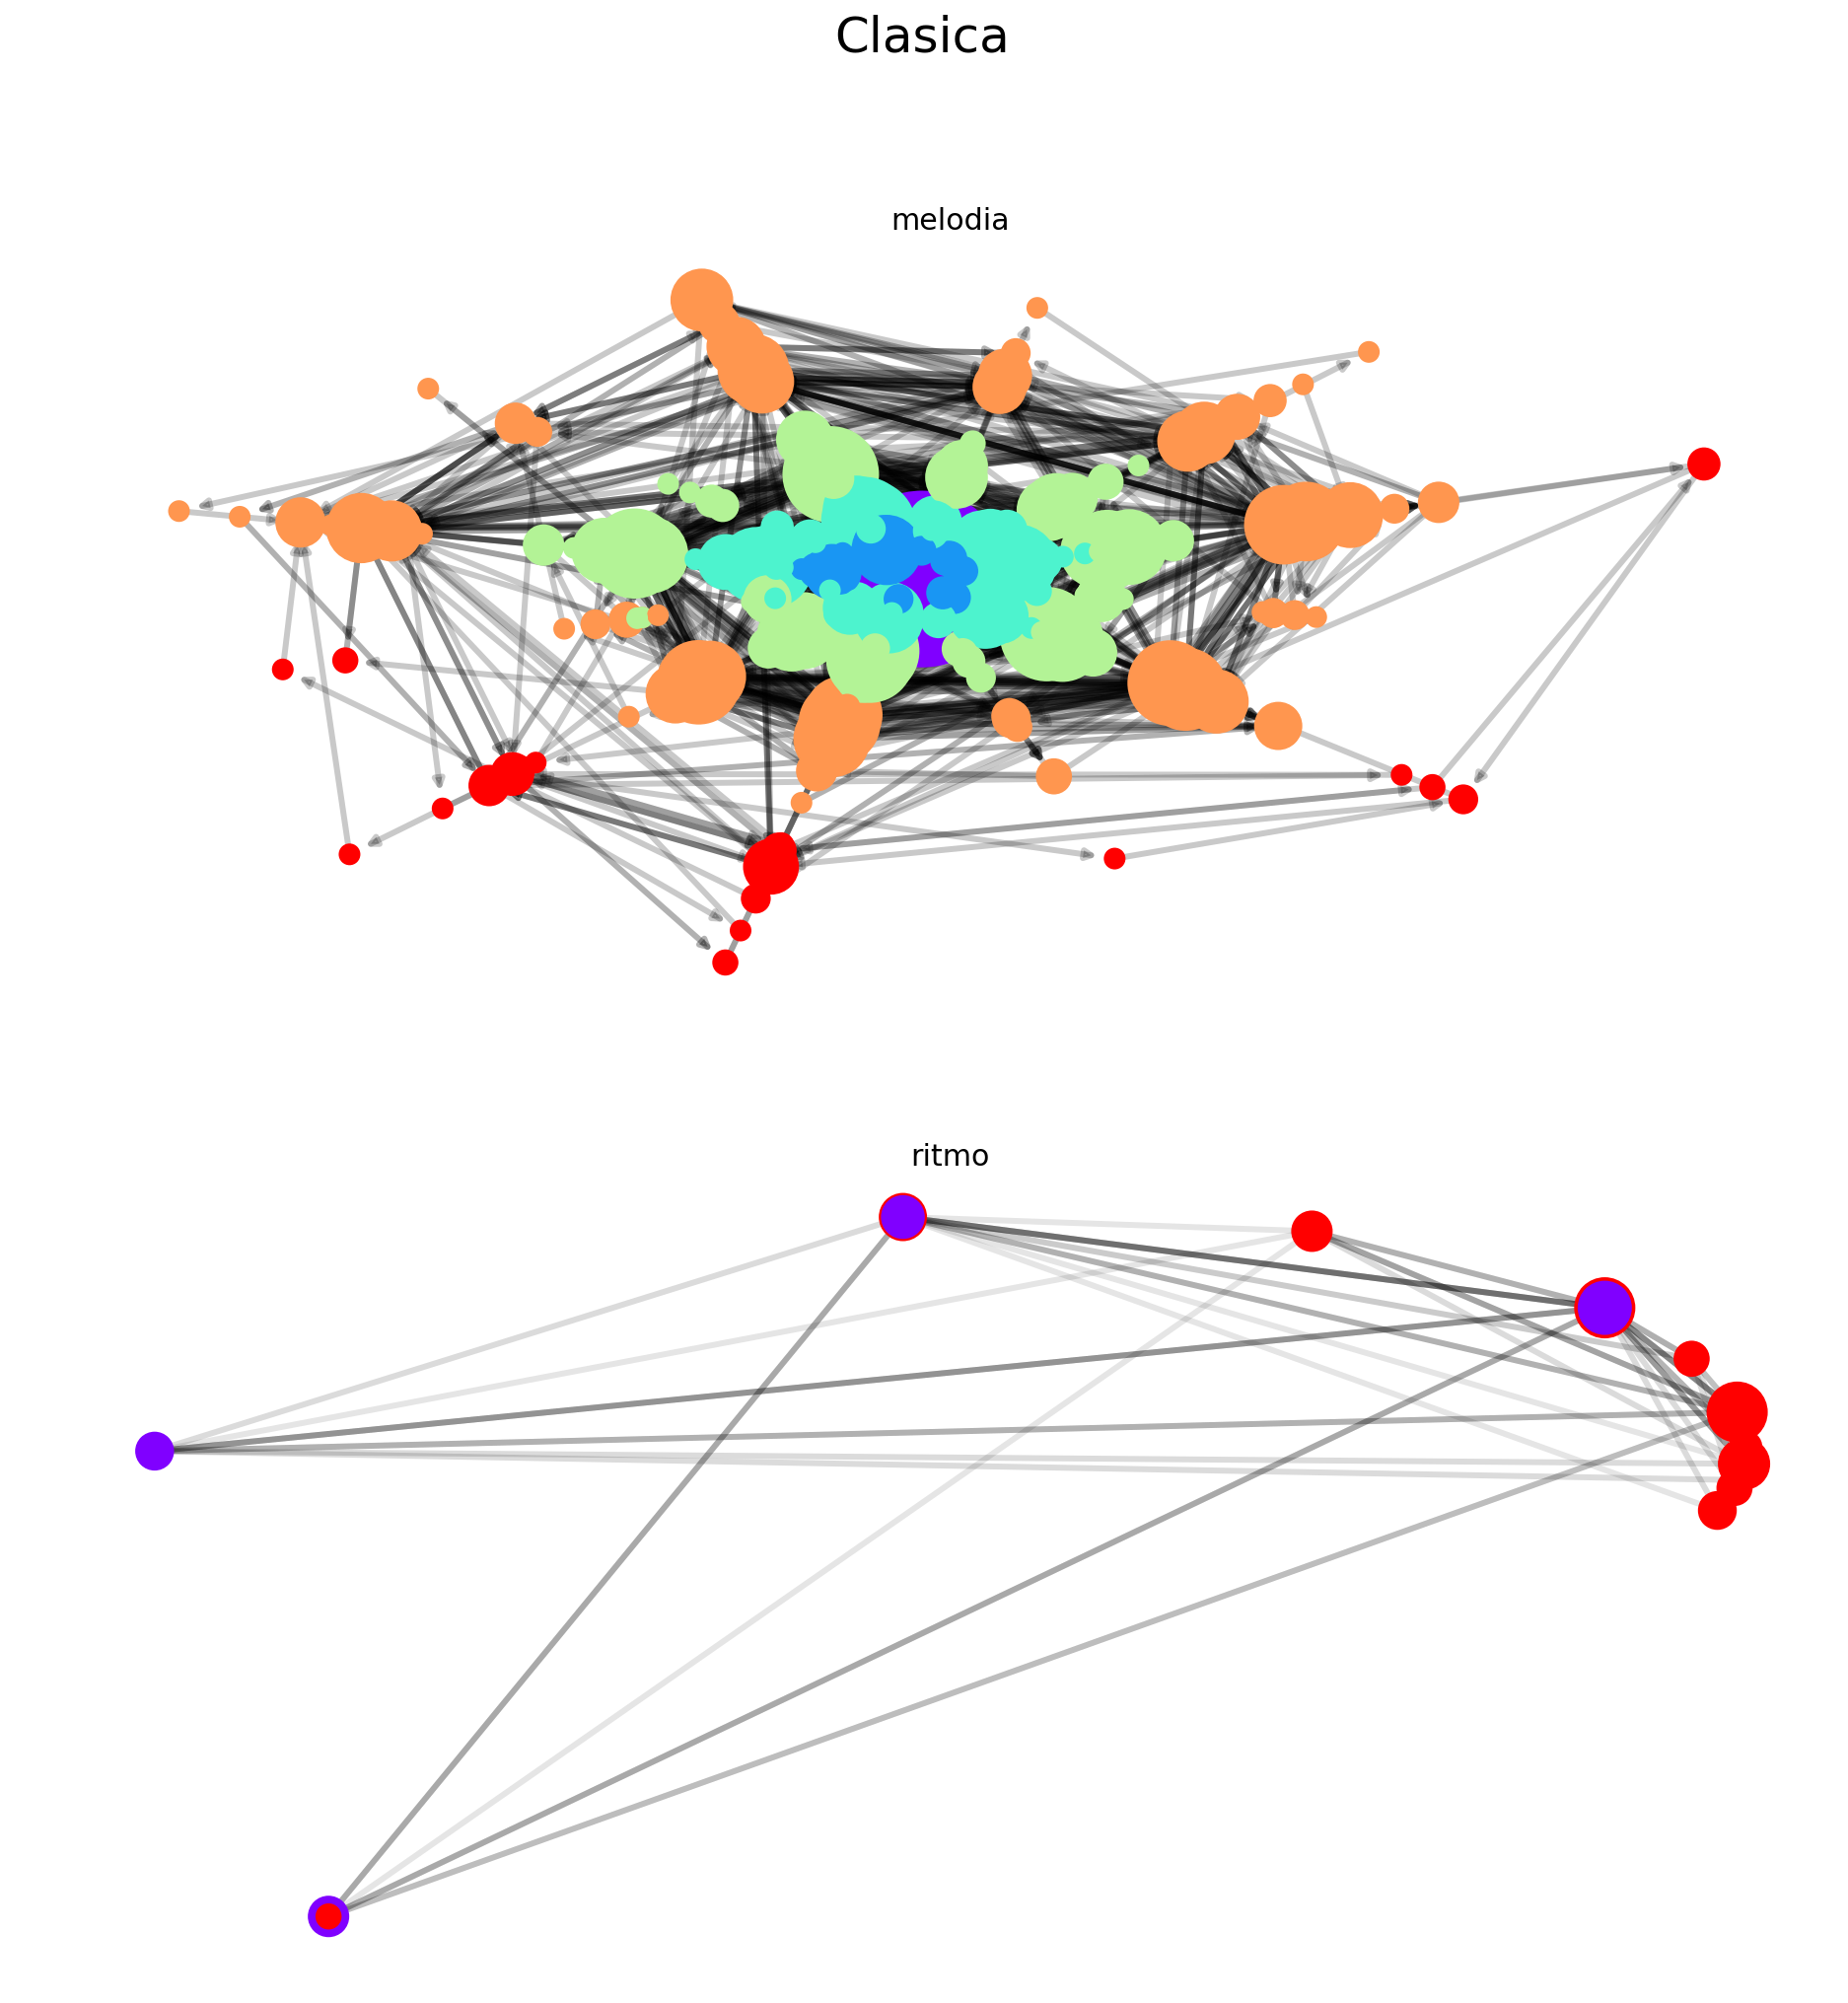

In [64]:
plt.figure(figsize=(16,16))
plt.suptitle('Clasica',fontsize=25)
plt.subplot(2, 1, 1)
plt.title('melodia',fontsize=15)
graficar(M_cl,labels=False)
plt.subplot(2, 1, 2)
plt.title('ritmo',fontsize=15)
graficar(R_cl,labels=False)
plt.show()

In [ ]:
#---------------------------------------------------------------------------------------
#Análisis por Etapa??
#---------------------------------------------------------------------